In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [2]:
train=pd.read_csv("../train.csv")
test=pd.read_csv("../test.csv")

In [3]:
train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [4]:
test.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [5]:
train.drop(['N_Days'],axis=1,inplace=True)
test.drop(['N_Days'],axis=1,inplace=True)

In [6]:
columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema','Drug']
le=LabelEncoder()
train['Status']=le.fit_transform(train['Status'])
for i in columns:
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i])

In [7]:
sc=StandardScaler()
columns_to_scale=['Age','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
train[columns_to_scale]=sc.fit_transform(train[columns_to_scale])
test[columns_to_scale]=sc.transform(test[columns_to_scale])

In [8]:
train.isnull().sum()

id               0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [9]:
test.isnull().sum()

id               0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
power_transformer = PowerTransformer(method='yeo-johnson')
train[columns_to_scale] = power_transformer.fit_transform(train[columns_to_scale])
test[columns_to_scale] = power_transformer.transform(test[columns_to_scale])

In [11]:
y=train['Status']
X=train.drop('Status',axis=1)

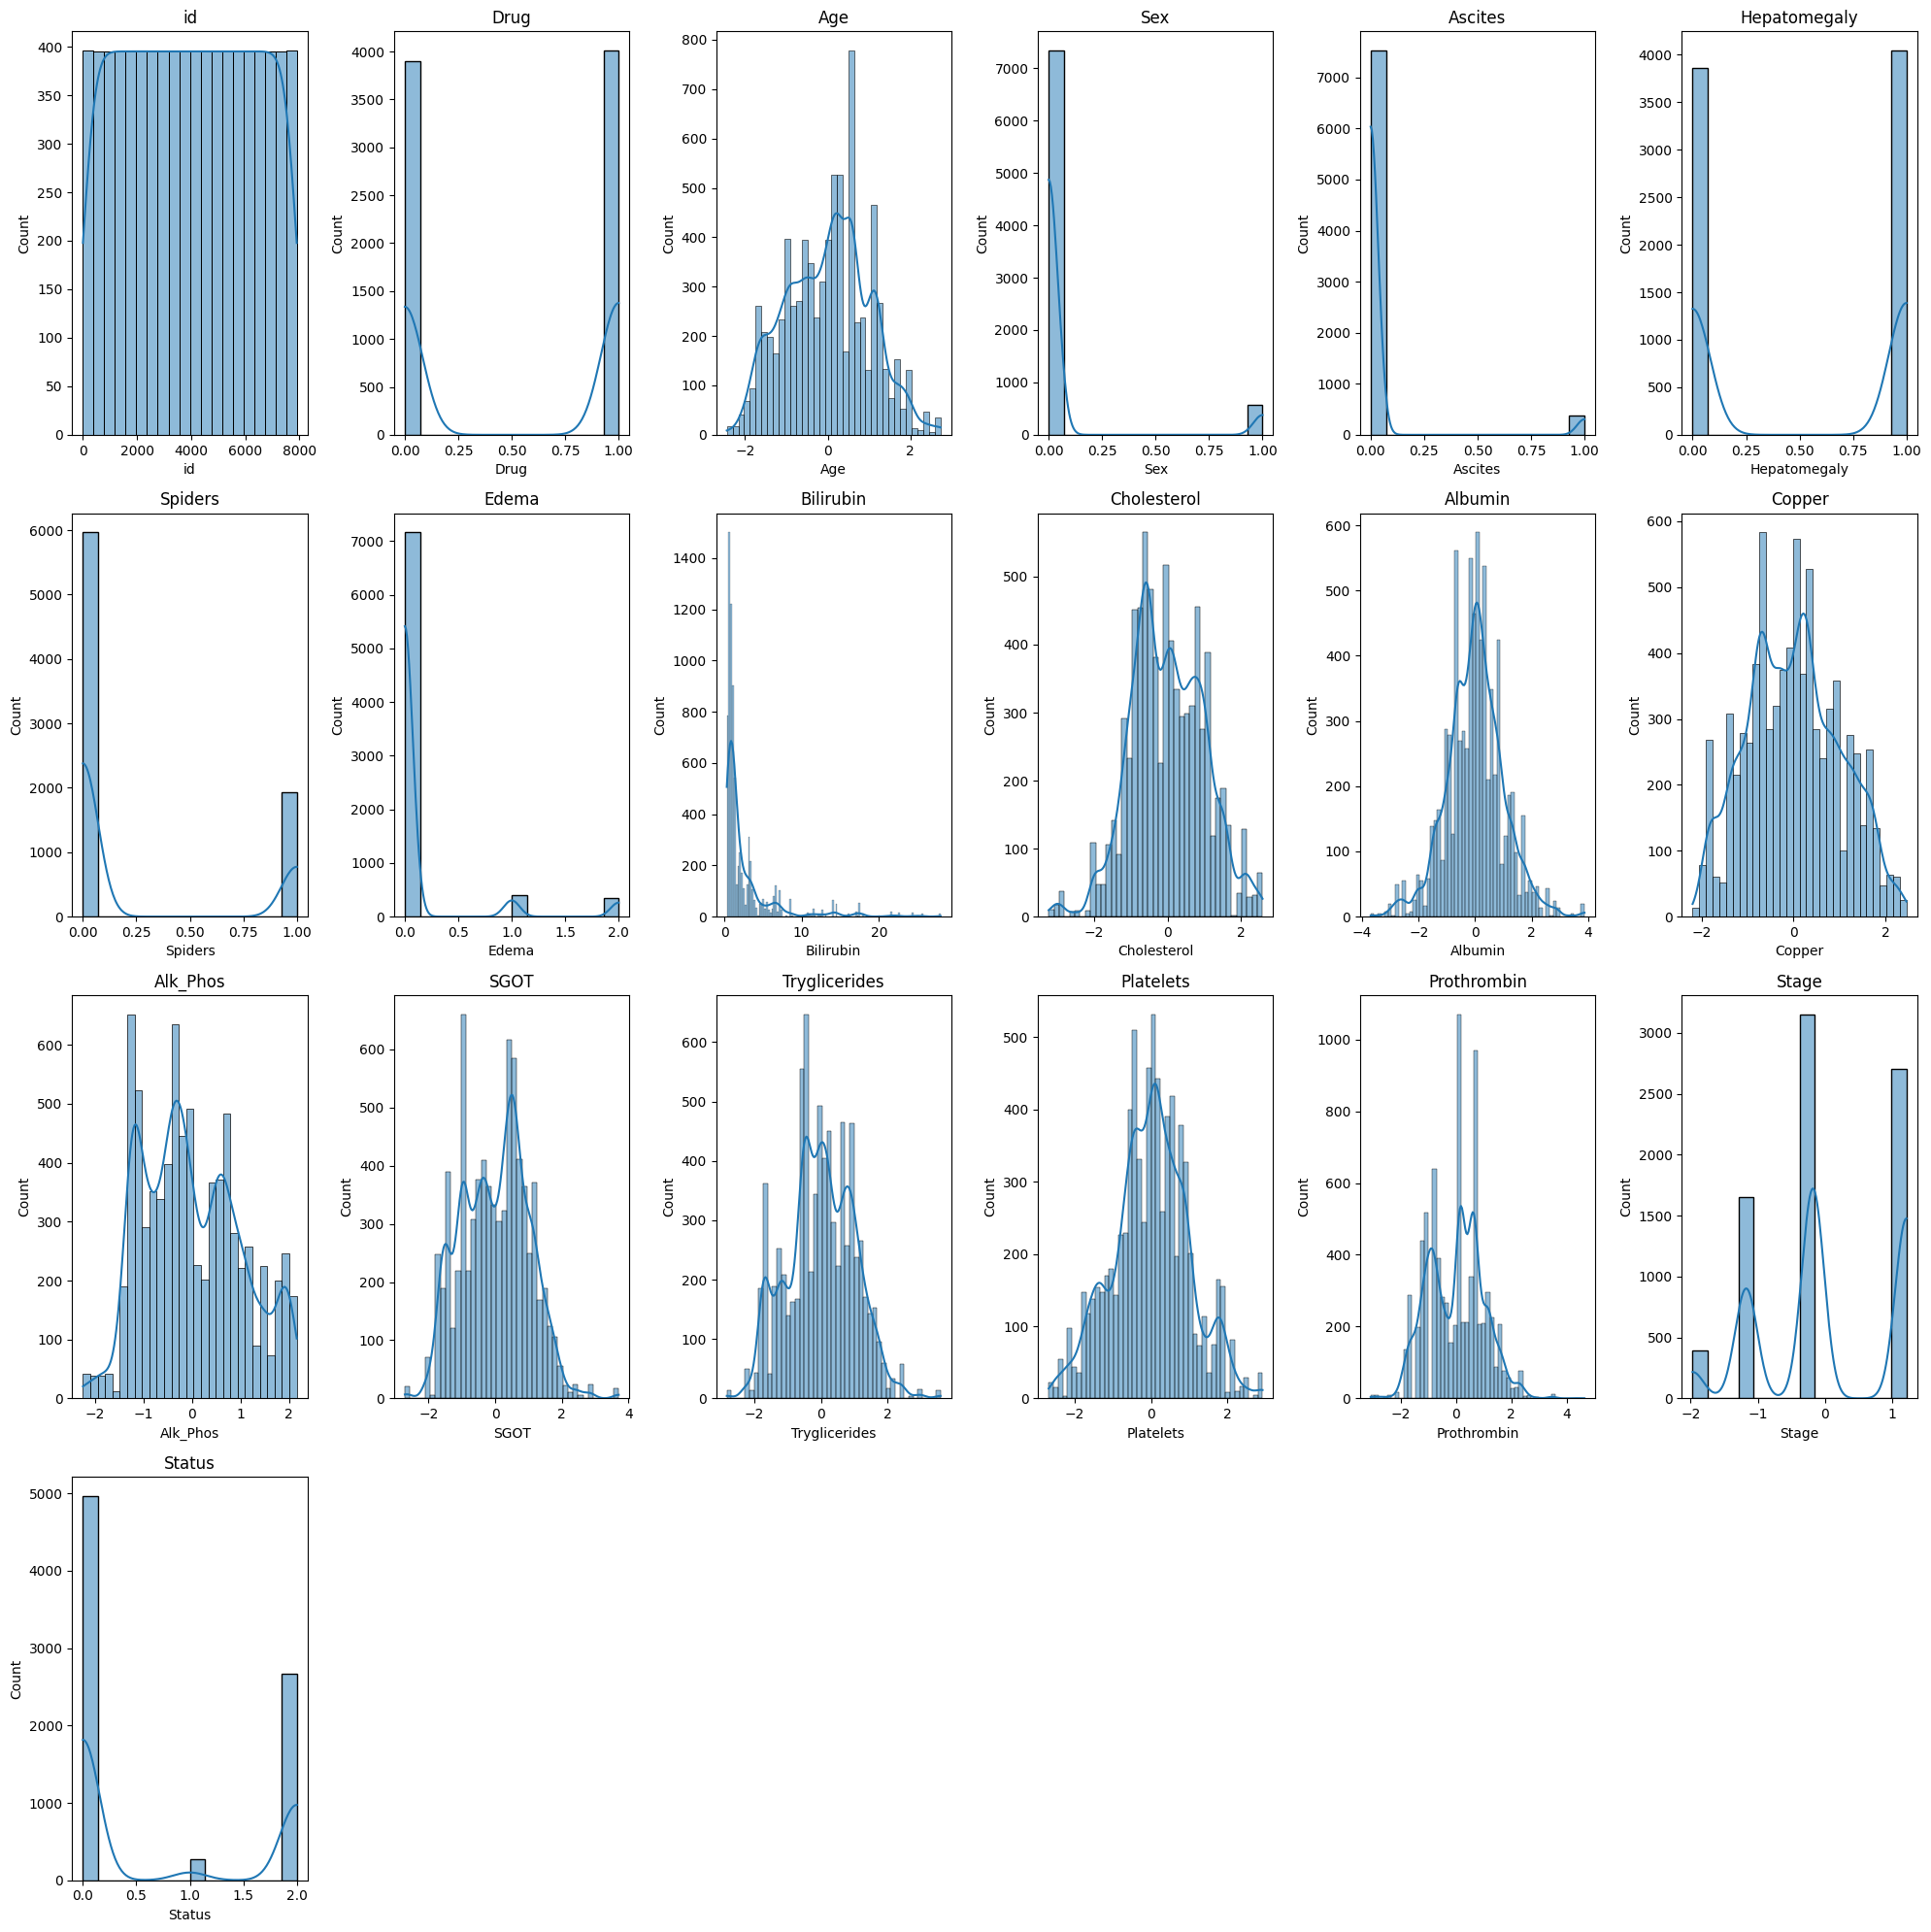

In [12]:
num_cols = len(train.columns)
num_rows = num_cols // 6 + (num_cols % 6 > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 6, figsize=(20, 5 * num_rows))

for i, ax in enumerate(axes.flatten()):
    if i < num_cols:
        sns.histplot(train.iloc[:, i], kde=True, ax=ax)
        ax.set_title(train.columns[i])
    else:
        fig.delaxes(ax)  # Remove empty subplots if there are fewer columns than expected

plt.tight_layout()
plt.show()

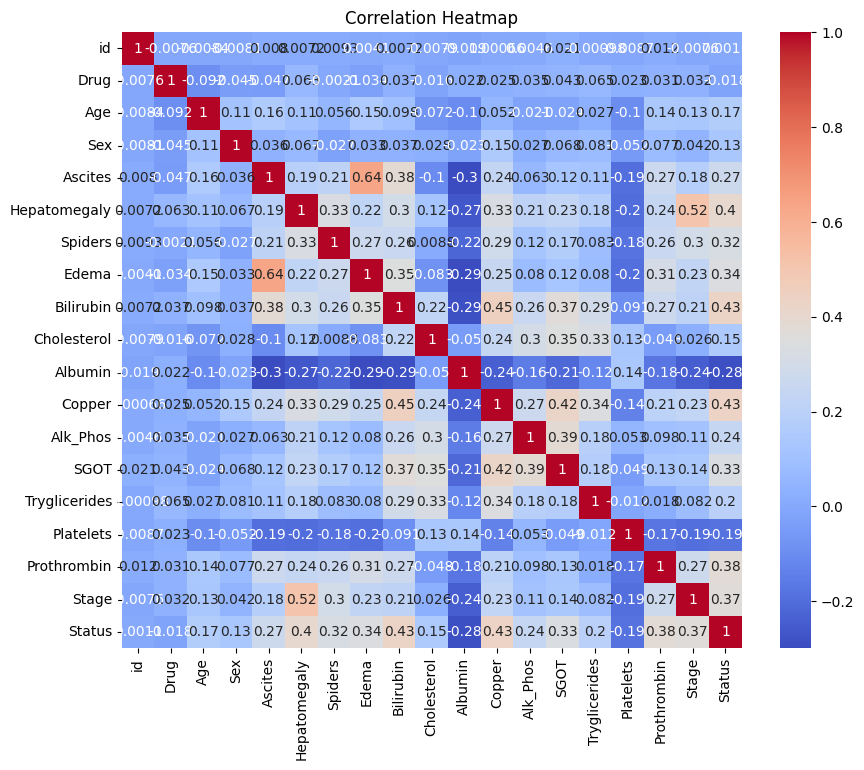

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

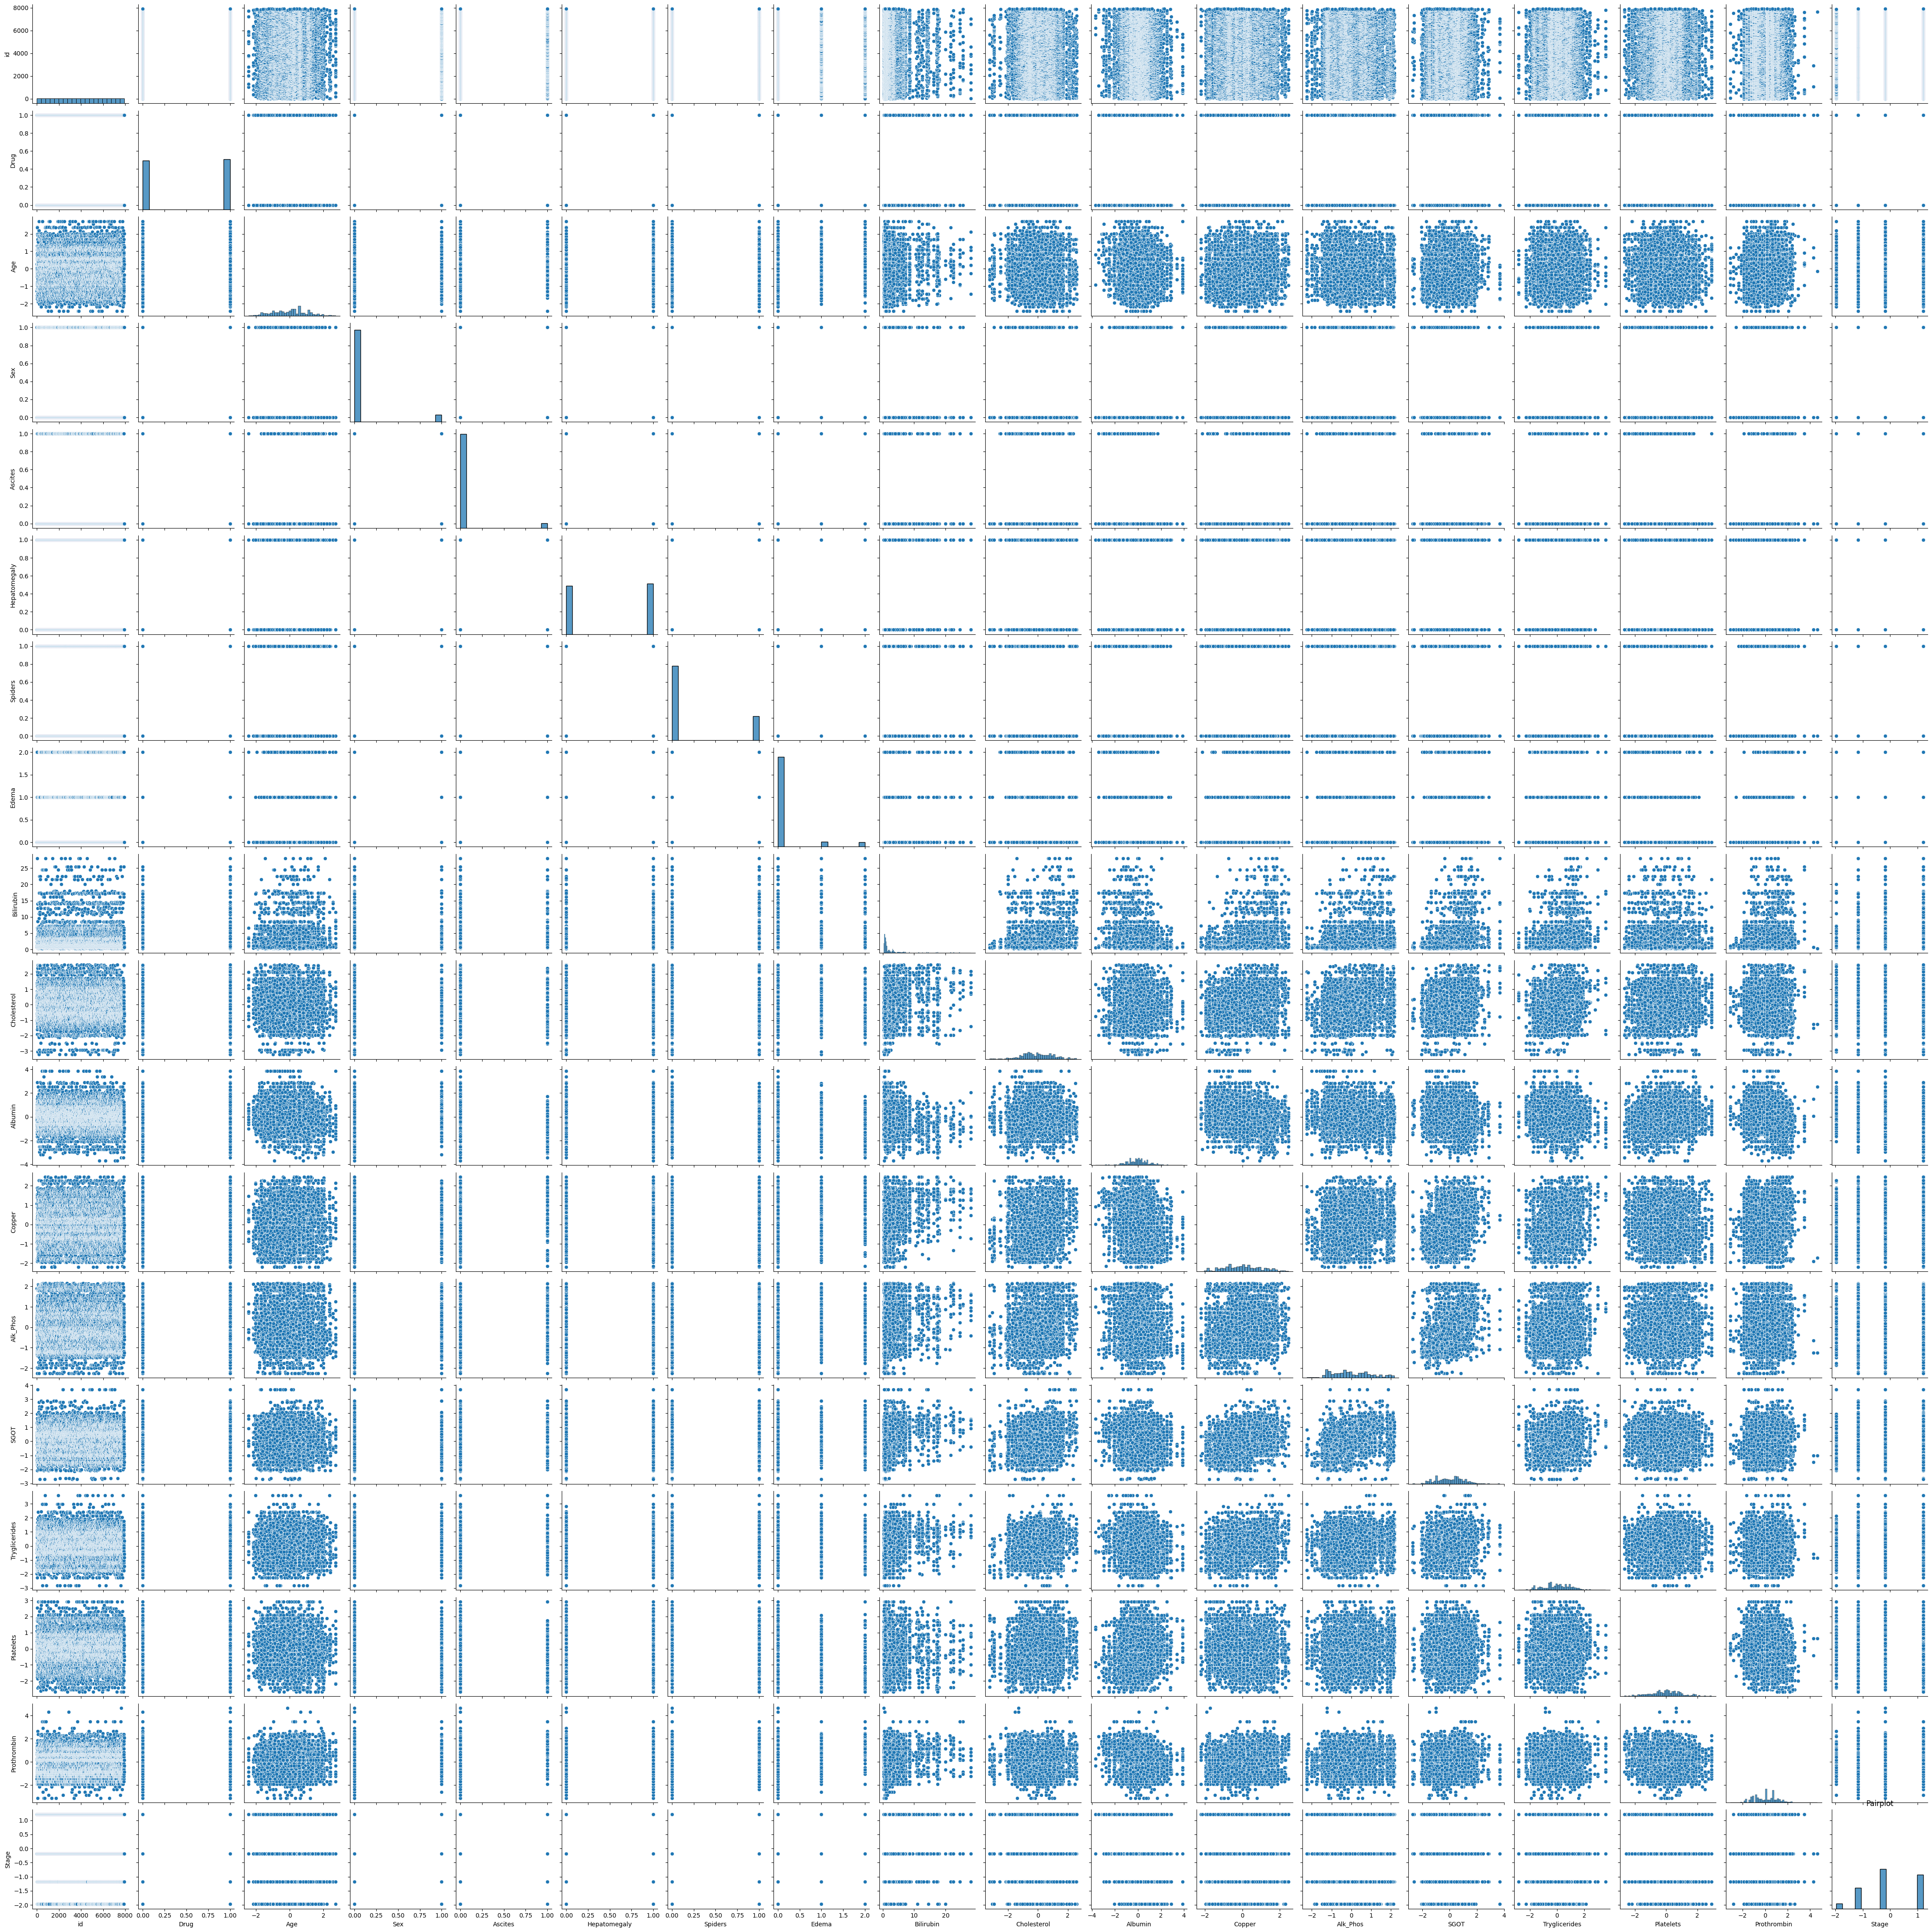

In [14]:
sns.pairplot(X)
plt.title('Pairplot')
plt.show()

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [17]:
y_pred = best_rf_model.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)
cr=classification_report(y_test, y_pred)
print("Classification report:\n",cr)

Accuracy: 0.8197343453510436
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.62      0.10      0.17        52
           2       0.82      0.71      0.76       563

    accuracy                           0.82      1581
   macro avg       0.76      0.58      0.60      1581
weighted avg       0.81      0.82      0.81      1581



In [19]:
y_test_pred=best_rf_model.predict(test)
prob2=best_rf_model.predict_proba(test)

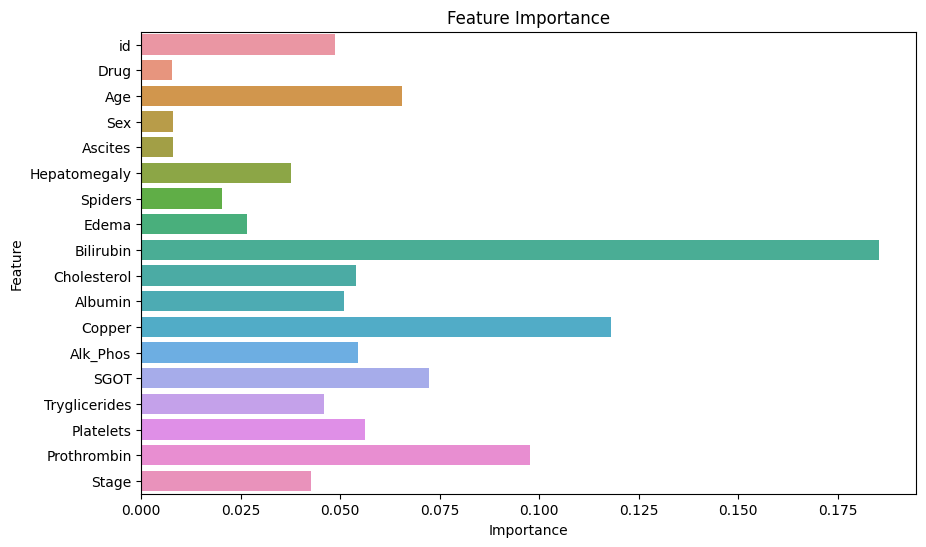

In [20]:
importances = best_rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

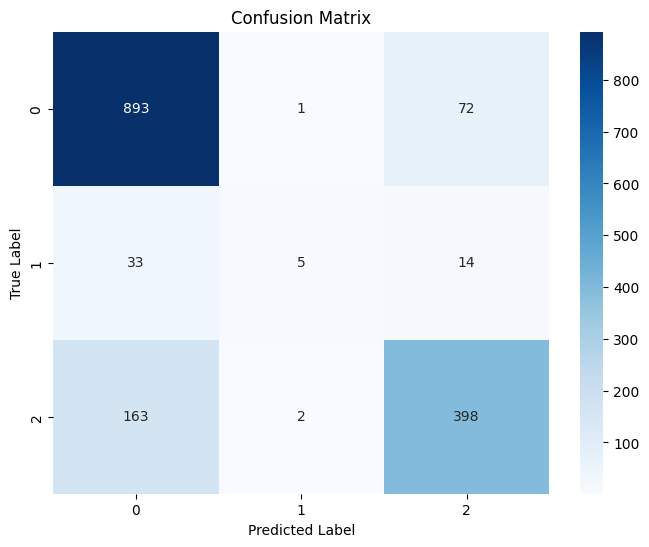

In [21]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

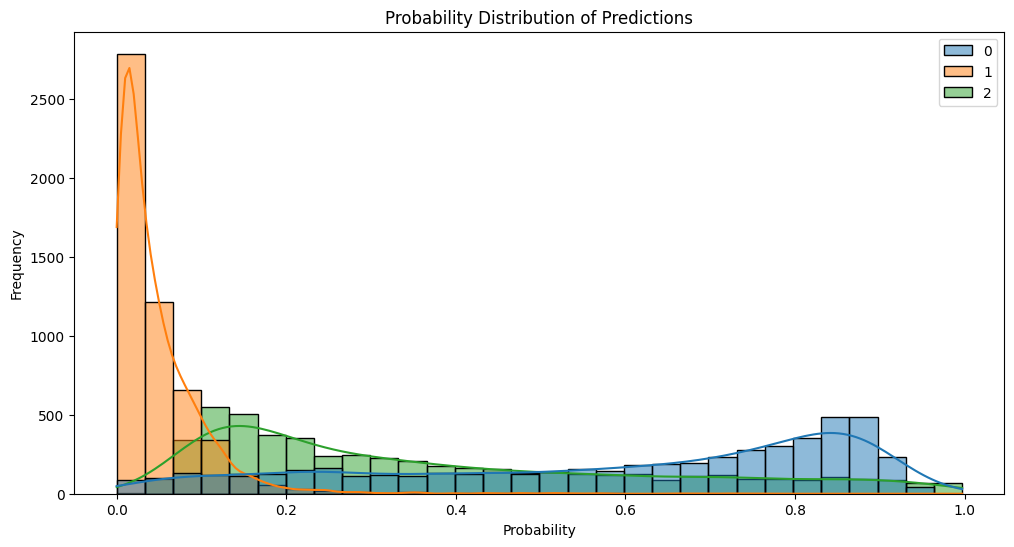

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(prob2, kde=True, bins=30)
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [23]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

y_test_pred_xgb = xgb_classifier.predict(test)
prob_xgb = xgb_classifier.predict_proba(test)

XGBoost Accuracy: 0.8241619228336496


In [24]:
submission=pd.DataFrame(prob2,columns=['Status_C','Status_D','Status_CL'])
submission['id']=test['id']
submission=submission[['id','Status_C','Status_D','Status_CL']]
submission.to_csv('submission.csv',index=False)